<a href="https://colab.research.google.com/github/ruinhadan/cifar10/blob/master/CIFAR10_Shallow_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Processing Data

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision

In [0]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
#testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

0it [00:00, ?it/s]

170500096it [00:05, 33590451.98it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle= True)

In [0]:
trainiter = iter(trainloader)
image, label = trainiter.next()
print(image[0].shape)
print(label[0])

torch.Size([3, 32, 32])
tensor(3)


In [0]:
def imshow(img):
  plt.figure(figsize = (1,1))
  plt.imshow(np.transpose(img.numpy(), (1,2,0)))
  plt.show()

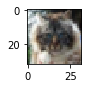

In [0]:
imshow(image[0])

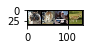

catcatcardeer


In [0]:
imshow(torchvision.utils.make_grid(image))
print(''.join(classes[label[j]] for j in range(4)))

In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
class CNN1(nn.Module):
  def __init__(self):
    super(CNN1, self).__init__()
    self.net = nn.Sequential(
      nn.Conv2d(3, 6, 3)  #[N, 3, 32, 32] -> [N, 6, 30, 30]
    )

  def forward(self, X):
    return self.net(X)

In [0]:
cnn = CNN1()
out = cnn(image)
print(out.shape)

torch.Size([4, 6, 30, 30])


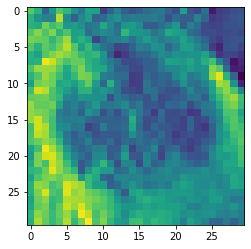

In [0]:
plt.imshow(out[0,5,:,:].detach().numpy())
plt.show()

In [0]:
for params in cnn.parameters():
  print(params.shape)

torch.Size([6, 3, 3, 3])
torch.Size([6])


In [0]:
class CNN2(nn.Module):
  def __init__(self):
    super(CNN2, self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(3, 6, 3),               # [N, 3, 32, 32] -> [N, 6, 30, 30]
        nn.AvgPool2d(2, stride = (2,2)),  # [N, 6, 30, 30] -> [N, 6, 15, 15]
        nn.Conv2d(6, 16, 3),              # [N, 6, 15, 15] -> [N, 16, 13, 13]
        nn.AvgPool2d(2, stride=(2,2))     # [N, 16, 13, 13] -> [N, 16, 6, 6]
    )

  def forward(self, X):
    return self.net(X)

In [0]:
cnn2 = CNN2()
out = cnn2.forward(image)
print(out.shape)

torch.Size([4, 16, 6, 6])


# LeNet

In [0]:
import torch.optim as optim

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn = nn.Sequential(
        nn.Conv2d(3, 6, 5),               # [N, 3, 32, 32] -> [N, 6, 28, 28]
        nn.ReLU(),
        nn.AvgPool2d(2, stride = (2,2)),  # [N, 6, 28, 28] -> [N, 6, 14, 14]
        nn.Conv2d(6, 16, 5),              # [N, 6, 14, 14] -> [N, 16, 10, 10]
        nn.ReLU(),
        nn.AvgPool2d(2, stride = (2,2))   # [N, 16, 10, 10] -> [N, 16, 5, 5]
    )

    self.fcn = nn.Sequential(
        nn.Linear(400, 120),              # [N, 400] -> [N, 120]
        nn.ReLU(),        
        nn.Linear(120, 84),               # [N, 120] -> [N, 84]
        nn.ReLU(),
        nn.Linear(84, 10)                 # [N, 84] -> [N, 10]
    )

  def forward(self, X):
    Y_temp =  self.cnn(X)
    #print(Y_temp.shape)
    Y_temp = Y_temp.view(Y_temp.size(0), -1)
    #print(Y_temp.shape)
    return self.fcn(Y_temp)

In [0]:
device = torch.device('cuda:0')

In [0]:
print(device)

cuda:0


In [0]:
net = LeNet().to(device)

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 128, shuffle = False)

In [0]:
def eval(dataloader):
  total = 0
  corr = 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    corr += (pred == labels).sum().item()
  return 100* (corr/total)
    

In [0]:
lossfn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch 0 - Train acc - 39.50, Test acc - 39.39 || tada - 390
Epoch 1 - Train acc - 46.07, Test acc - 46.40 || tada - 390
Epoch 2 - Train acc - 45.93, Test acc - 45.80 || tada - 390
Epoch 3 - Train acc - 50.39, Test acc - 49.25 || tada - 390
Epoch 4 - Train acc - 53.31, Test acc - 51.72 || tada - 390
Epoch 5 - Train acc - 54.10, Test acc - 52.39 || tada - 390
Epoch 6 - Train acc - 55.33, Test acc - 53.16 || tada - 390
Epoch 7 - Train acc - 56.91, Test acc - 54.15 || tada - 390
Epoch 8 - Train acc - 58.12, Test acc - 55.43 || tada - 390
Epoch 9 - Train acc - 59.65, Test acc - 56.29 || tada - 390
Epoch 10 - Train acc - 59.25, Test acc - 55.85 || tada - 390
Epoch 11 - Train acc - 60.40, Test acc - 56.39 || tada - 390
Epoch 12 - Train acc - 61.99, Test acc - 57.56 || tada - 390
Epoch 13 - Train acc - 61.68, Test acc - 57.35 || tada - 390
Epoch 14 - Train acc - 62.56, Test acc - 57.49 || tada - 390
Epoch 15 - Train acc - 63.96, Test acc - 58.97 || tada - 390


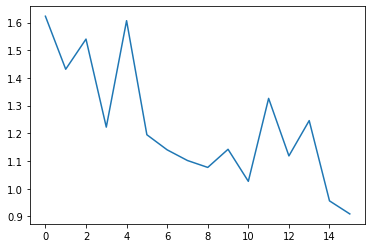

CPU times: user 2min 44s, sys: 1.09 s, total: 2min 46s
Wall time: 2min 46s


In [0]:
%%time

loss_arr = []
epochs = 16

for epoch in range(epochs):
  for i, data in enumerate(trainloader, 0):
    images, labels = data
    images, labels = images.to(device), labels.to(device)

    opt.zero_grad()

    out = net(images)
    loss = lossfn(out, labels)
    loss.backward()
    opt.step()

  loss_arr.append(loss.item())
  print('Epoch %d - Train acc - %0.2f, Test acc - %0.2f || tada - %d' %(epoch, eval(trainloader), eval(testloader), i))

plt.plot(loss_arr)
plt.show()